# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
import warnings
warnings.filterwarnings(action = 'ignore')

In [5]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

In [12]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2, 
                           n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1)

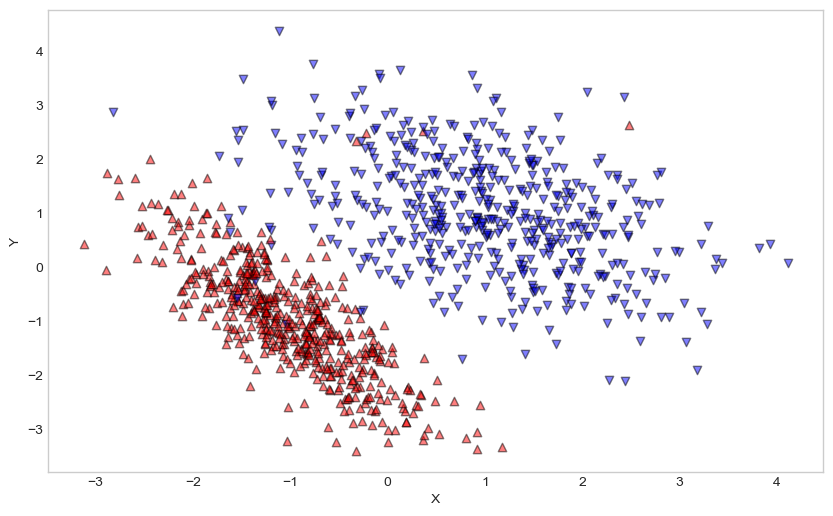

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('Y')

for i in range(samples):
    if not y[i]:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha = 0.5, marker='^', color = 'r')
    else:
        ax.scatter(X[i, 0], X[i, 1], edgecolors='k', alpha = 0.5, marker='v', color = 'b')
        
plt.show()

In [14]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3)

In [15]:
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [16]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9842857142857143
test data score : 0.9766666666666667


In [17]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print('CV mean score : {}'.format(scores.mean()))

CV mean score : 0.982


In [18]:
model.coef_, model.intercept_

(array([[2.70549422, 2.27033398]]), array([1.05863357]))

In [19]:
min_X, max_X = X[:,0].min() - 0.5, X[:,0].max() + 0.5
min_y, max_y = X[:,1].min() - 0.5, X[:,1].max() + 0.5

xx, yy = np.meshgrid(np.arange(min_X, max_X, 0.02), np.arange(min_y, max_y, 0.02))

In [24]:
min_y, max_y

(-3.9074395127452437, 4.874015652770197)

In [21]:
xx.shape

(440, 412)

In [25]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

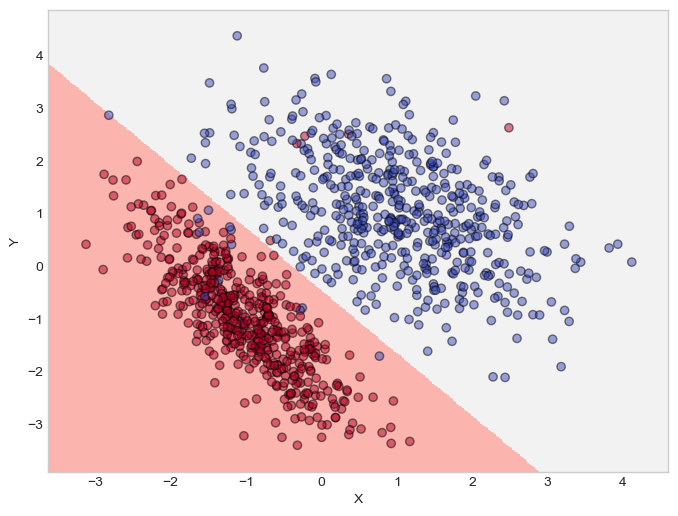

In [31]:
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)

plt.scatter(X[:, 0], X[:, 1], c = np.abs(y-1), edgecolors='k', alpha = 0.5, cmap = plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

plt.show()

### 붓꽃 데이터

In [32]:
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    peta

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [33]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species

In [34]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [35]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


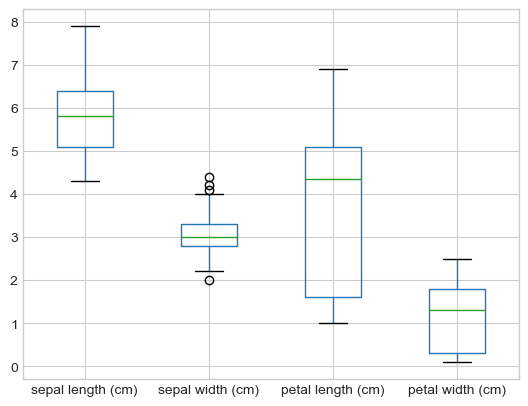

In [36]:
iris_df.boxplot();

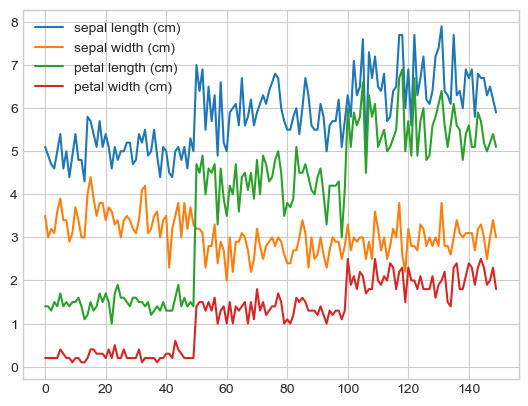

In [37]:
iris_df.plot();

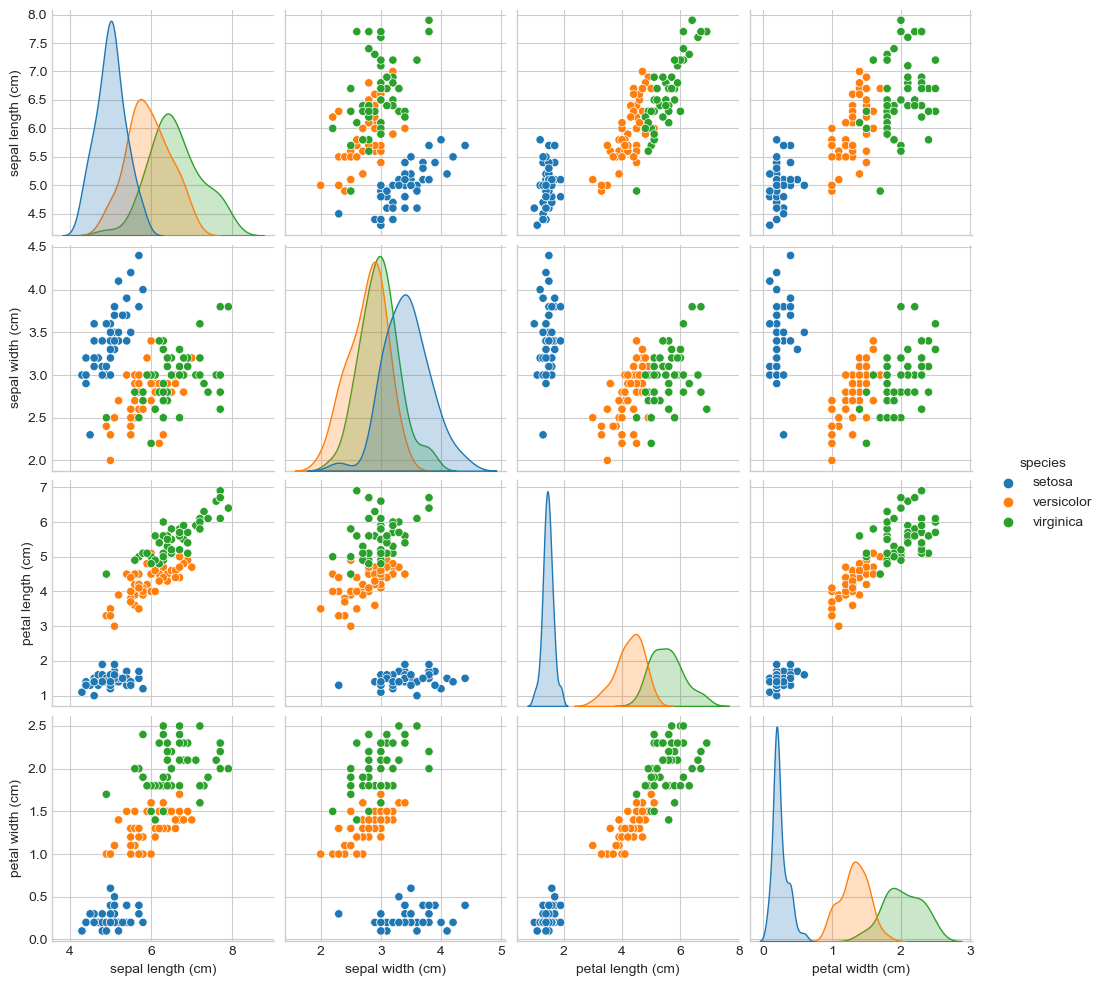

In [38]:
import seaborn as sns

sns.pairplot(iris_df, hue = 'species');

## 붓꽃 데이터에 대한 로지스틱 회귀

In [39]:
train_X, test_X, train_y, test_y = train_test_split(iris.data[:, [2, 3]], iris.target, test_size=0.3,
                                                    random_state=42, stratify = iris.target)

In [40]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', C = 100.0, random_state=42)
model.fit(train_X, train_y)

LogisticRegression(C=100.0, random_state=42)

In [41]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9714285714285714
test data score : 0.9333333333333333


In [43]:
X = np.vstack((train_X, test_X))
y = np.hstack((train_y, test_y))

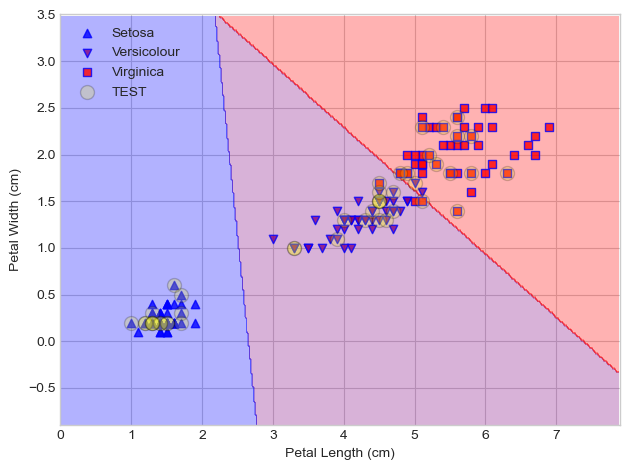

In [50]:
from matplotlib.colors import ListedColormap

min_X1, max_X1 = X[:,0].min() - 1, X[:,0].max() + 1
min_X2, max_X2 = X[:,1].min() - 1, X[:,1].max() + 1

xx1, xx2 = np.meshgrid(np.arange(min_X1, max_X1, 0.02), np.arange(min_X2, max_X2, 0.02))

Z = model.predict(np.c_[xx1.ravel(), xx2.ravel()])
Z = Z.reshape(xx1.shape)

species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha = 0.3, cmap = cmap)

plt.xlim(min_X1, max_X1)
plt.ylim(min_X2, max_X2)

for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = X[y == cl, 0], y=X[y == cl, 1],
                alpha = 0.8, c = colors[idx],
                marker = markers[idx], label = species[cl],
                edgecolors='b')

X_comb_test, y_comb_test = X[range(105, 150),:],y[range(105, 150)]
plt.scatter(X_comb_test[:,0], X_comb_test[:,1],
            c='yellow', edgecolors='k', alpha = 0.2,
            linewidth = 1, marker='o',
            s = 100, label = 'TEST')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

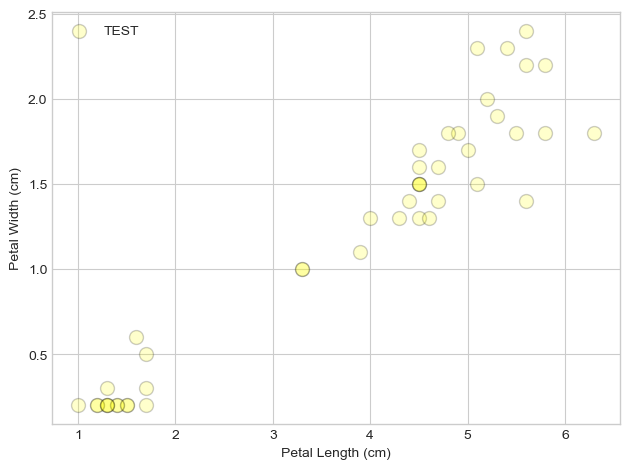

In [49]:
X_comb_test, y_comb_test = X[range(105, 150),:],y[range(105, 150)]
plt.scatter(X_comb_test[:,0], X_comb_test[:,1],
            c='yellow', edgecolors='k', alpha = 0.2,
            linewidth = 1, marker='o',
            s = 100, label = 'TEST')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc = 'upper left')
plt.tight_layout();

In [51]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{
    'penalty': ['l1', 'l2'],
    'C' : [2.0, 2.2, 2.4, 2.6, 2.8]
}]

gs = GridSearchCV(estimator = LogisticRegression(), param_grid = param_grid,
                  scoring='accuracy', cv = 10, n_jobs=-1)

In [53]:
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [54]:
result = gs.fit(iris.data, iris.target)

In [55]:
result.best_estimator_

LogisticRegression(C=2.4)

In [56]:
result.best_params_ # 최적 파라미터

{'C': 2.4, 'penalty': 'l2'}

In [57]:
result.best_score_ # 최적 점수

0.9800000000000001

In [59]:
pd.DataFrame(result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000499,0.000669,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.042886,0.008065,0.001696,0.000897,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000798,0.000599,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
3,0.031115,0.002555,0.000798,0.000399,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000997,0.000446,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
5,0.027227,0.001787,0.000698,0.000457,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000698,0.000457,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
7,0.025632,0.001414,0.000599,0.000489,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000499,0.000499,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
9,0.021442,0.002897,0.000498,0.000498,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

In [60]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [62]:
print(cancer.keys())
print(cancer.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

In [61]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [63]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['Target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [64]:
cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [65]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

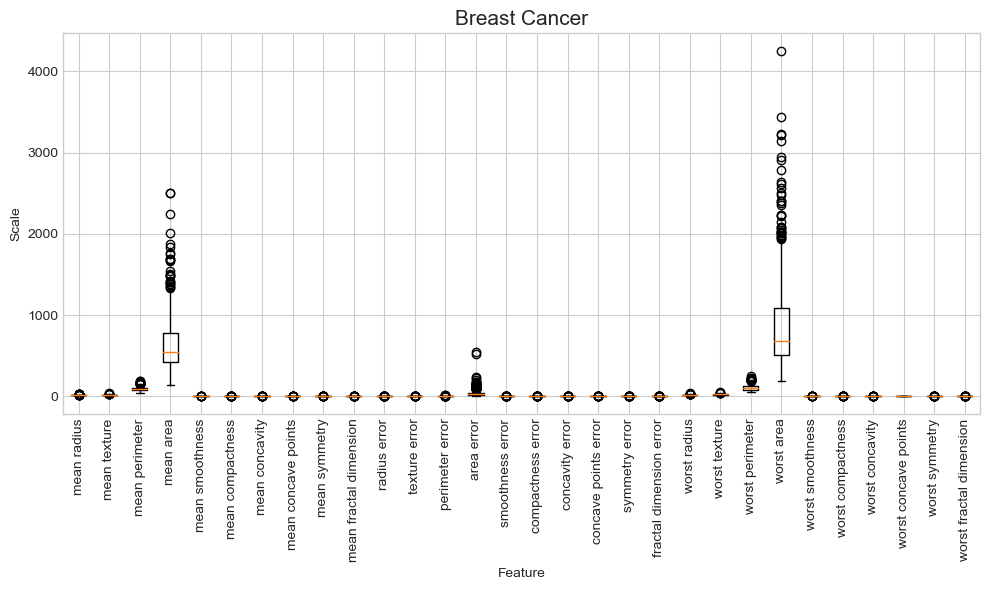

In [66]:
fig = plt.figure(figsize=(10, 6))
plt.title('Breast Cancer', fontsize = 15)
plt.boxplot(cancer.data)
plt.xticks(np.arange(30) + 1, cancer.feature_names, rotation = 90)
plt.xlabel('Feature')
plt.ylabel('Scale')
plt.tight_layout()

## 유방암 데이터에 대한 로지스틱 회귀

In [67]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify = y)

In [68]:
model = LogisticRegression(max_iter=3000, random_state=42)
model.fit(train_X, train_y)

LogisticRegression(max_iter=3000, random_state=42)

In [69]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.964824120603015
test data score : 0.9415204678362573


# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

In [71]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [72]:
X, y = load_breast_cancer(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify = y)

In [74]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss = 'squared_error'))
model.fit(train_X, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [75]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.7623776505586194
test data score : 0.6968601280685813


## 붓꽃 데이터에 대한 SGD 분류

In [76]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import load_iris

In [77]:
X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    random_state=42, stratify = y)

In [80]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss = 'squared_error')) # loss가 hinge일 경우 svm을 사용함
model.fit(train_X, train_y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [81]:
print('train data score : {}'.format(model.score(train_X, train_y)))
print('test data score : {}'.format(model.score(test_X, test_y)))

train data score : 0.9261263113531937
test data score : 0.8868978317958959
